In [28]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
import numpy as np

In [29]:
from PIL import Image
import os
import xml.etree.ElementTree as ET

drive_path = os.path.join(os.getcwd(), "../dataset")

# Paths to your dataset
dataset_dir = drive_path + '/filtered/Image'

for cls in os.listdir(dataset_dir):
  for img in os.listdir(dataset_dir + "/" + cls):
    image_file = dataset_dir + "/" + cls + "/" + img
    image = Image.open(image_file)
    annomation = image_file.replace("/Image", "/Annotation")
    annomation = annomation.replace(".jpg", "")
    tree = ET.parse(annomation)
    root = tree.getroot()
    bndbox = root.find(".//bndbox")  # Locate the <bndbox> tag
    xmin = int(bndbox.find("xmin").text)
    ymin = int(bndbox.find("ymin").text)
    xmax = int(bndbox.find("xmax").text)
    ymax = int(bndbox.find("ymax").text)

    crop_coords = (xmin, ymin, xmax, ymax)  # (x_min, y_min, x_max, y_max)

    cropped_image = image.crop(crop_coords)
    cropped_folder = image_file.split("/Image")[0] + "/ImageCropped/" + cls
    if not os.path.exists(cropped_folder):
      os.mkdir(cropped_folder)
    cropped_filepath = cropped_folder + "/" + img
    cropped_image.save(cropped_filepath)


In [30]:
drive_path = os.path.join(os.getcwd(), "../dataset")

# Paths to your dataset
dataset_dir = drive_path + '/filtered/ImageCropped'


# Data Augmentation
datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

val_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',  # Specify this as validation data
    shuffle=False
)


Found 1963 images belonging to 12 classes.
Found 389 images belonging to 12 classes.


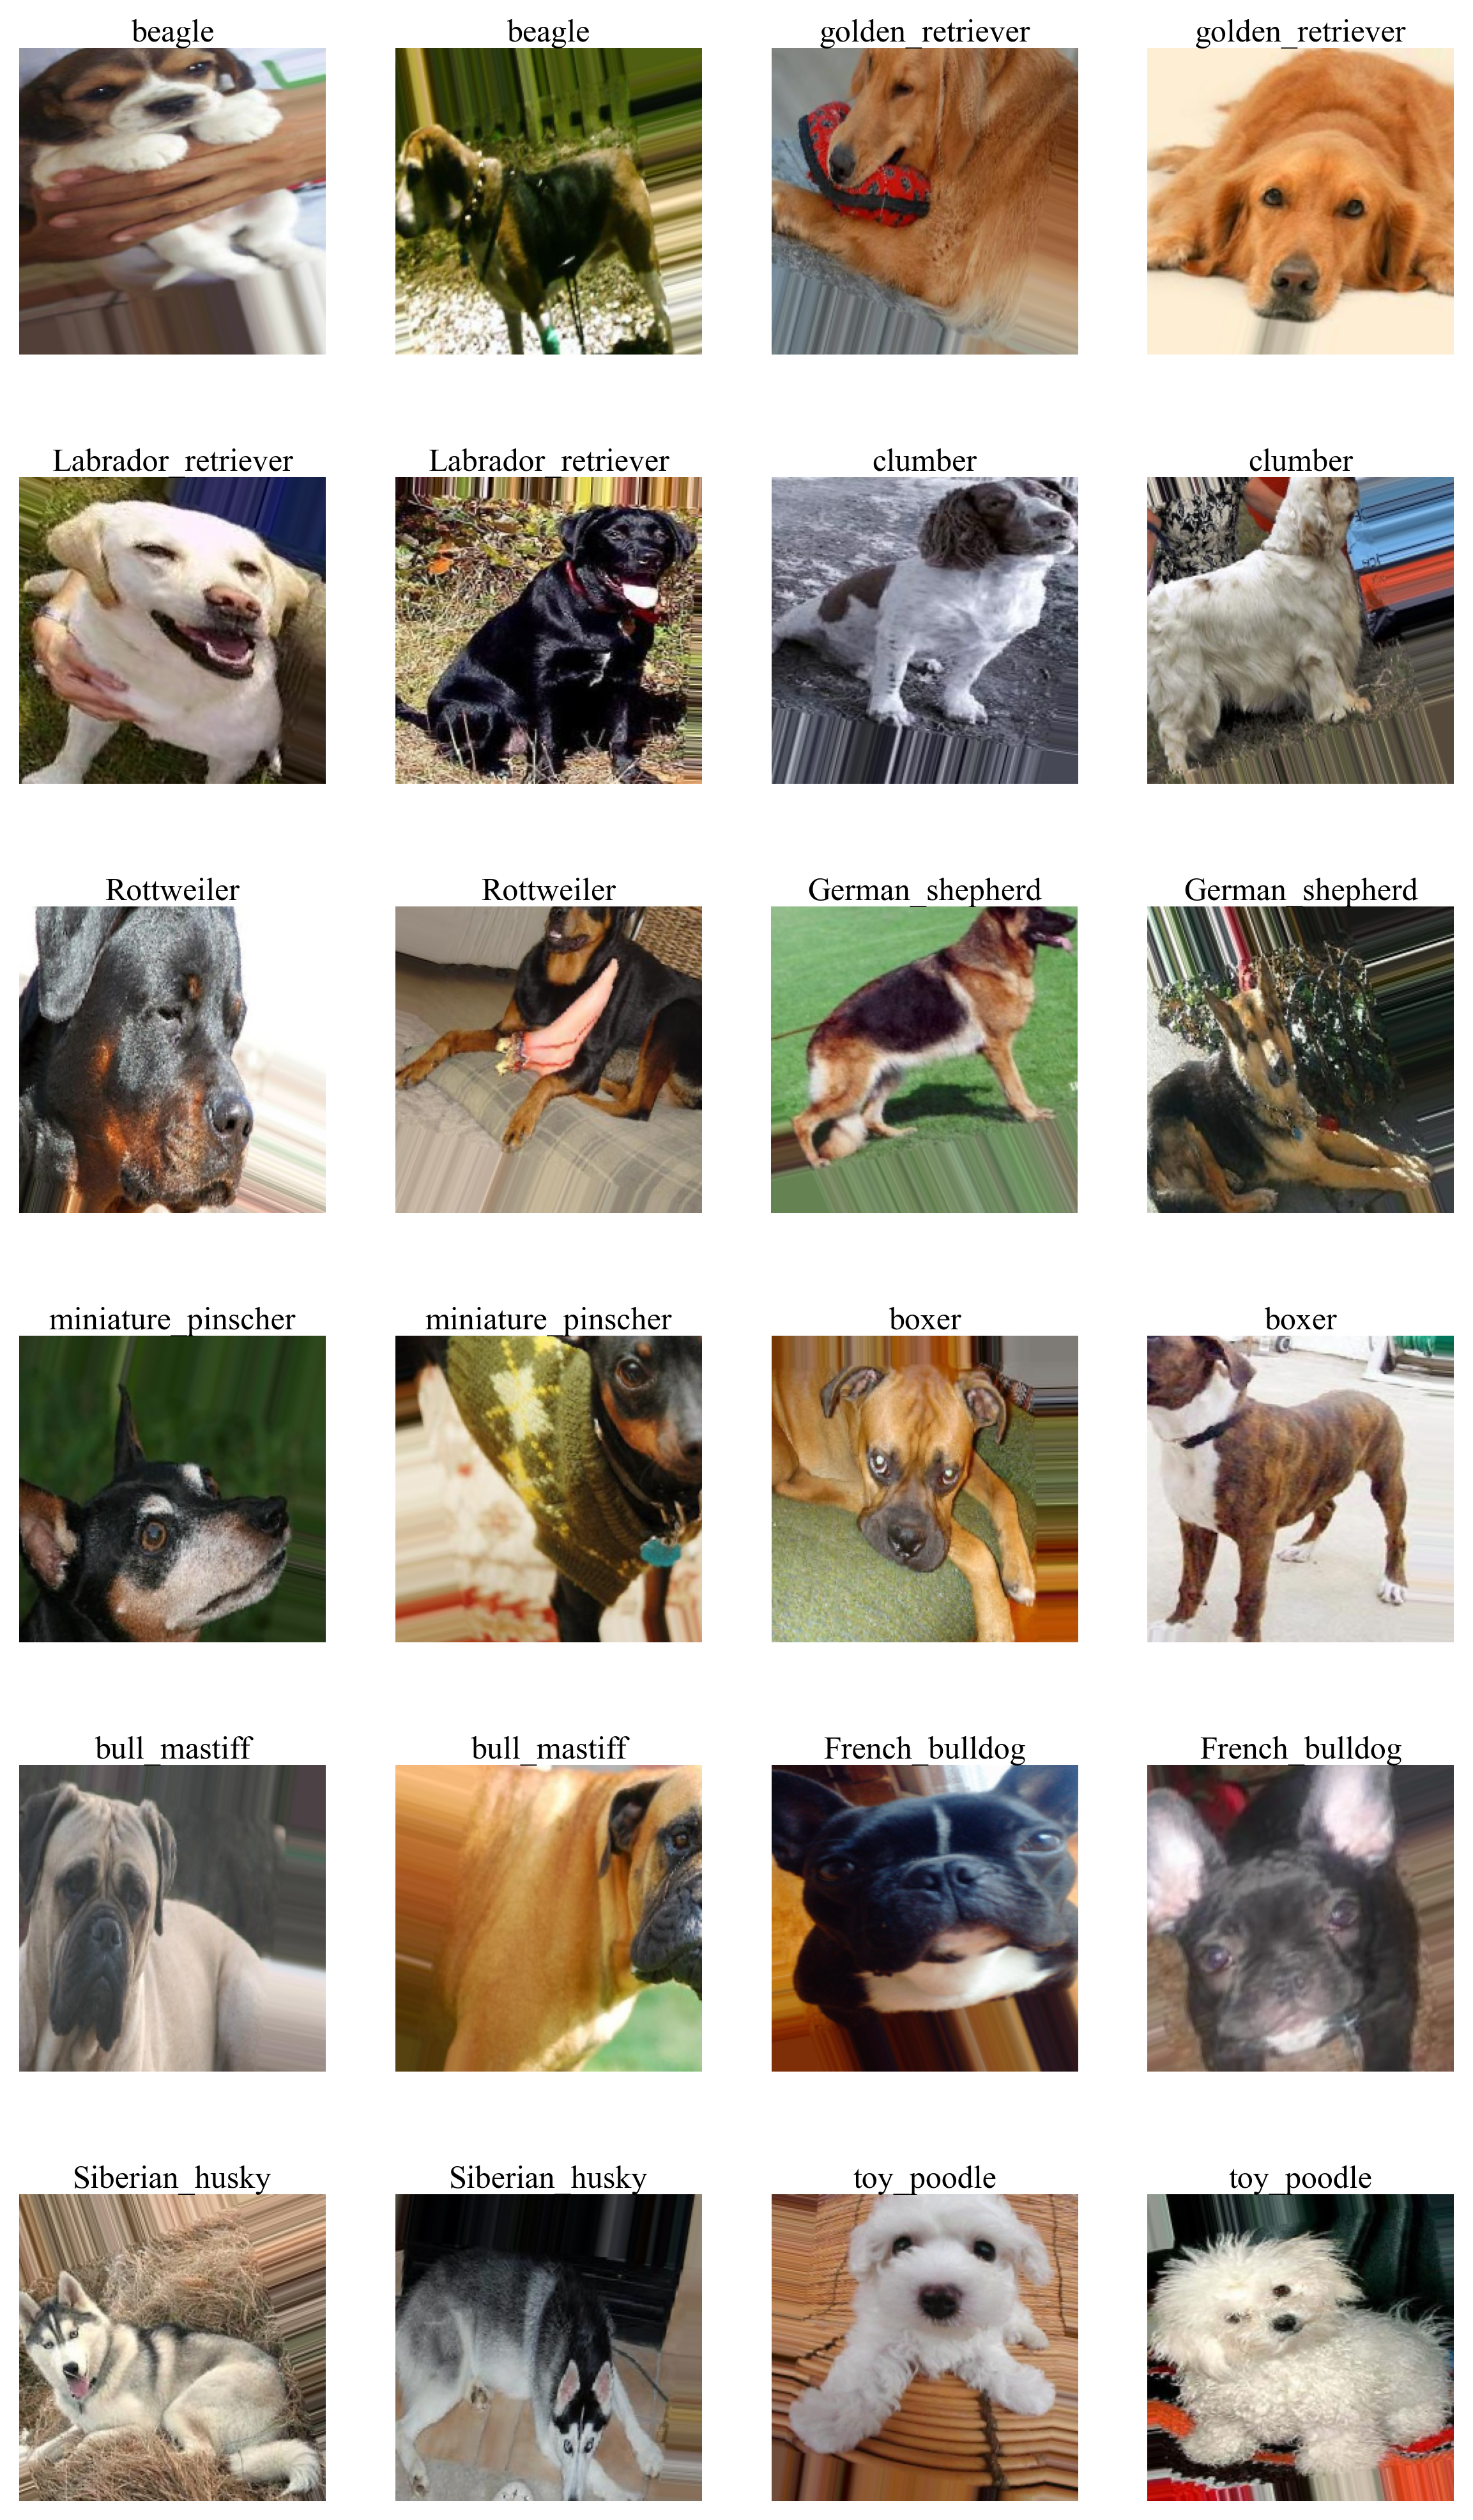

In [31]:
class_indices = train_generator.class_indices
class_names = list(class_indices.keys())

# Collect 2 samples per class
images_and_labels = []
samples_collected = {class_name: 0 for class_name in class_names}

for images, labels in train_generator:
    for i in range(images.shape[0]):
        class_index = np.argmax(labels[i])
        class_name = class_names[class_index]
        if samples_collected[class_name] < 2:
            images_and_labels.append((images[i], class_name))
            samples_collected[class_name] += 1
    if all(count == 2 for count in samples_collected.values()):
        break

# Plotting
total_images = len(images_and_labels)
cols = 4
rows = (total_images + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(cols * 2.0, rows * 2.2), dpi=300)

# Flatten axes for easy iteration
axes = axes.flatten()

for i in range(rows * cols):
    ax = axes[i]
    ax.axis('off')
    if i < total_images:
        image, label = images_and_labels[i]
        ax.imshow(image)
        ax.set_title(label.split("-")[1], fontsize=12, pad=2)

plt.tight_layout()
plt.subplots_adjust(hspace=0.4)
plt.savefig("class_samples_grid.png", bbox_inches='tight', pad_inches=0.05)
plt.show()

In [33]:
class_indices = train_generator.class_indices
class_names = {v: k for k, v in class_indices.items()}

from collections import Counter

class_counts = Counter(train_generator.classes)
total_data_per_class = {class_names[k]: v for k, v in class_counts.items()}

train_histogram = {}
for class_name, count in total_data_per_class.items():
  train_histogram[class_name.split("-")[1]] = count
# print(train_histogram)

sorted_train_histogram = sorted(train_histogram.items(), key=lambda x: x[0], reverse=True)
# print(sorted_train_histogram, type(sorted_train_histogram))


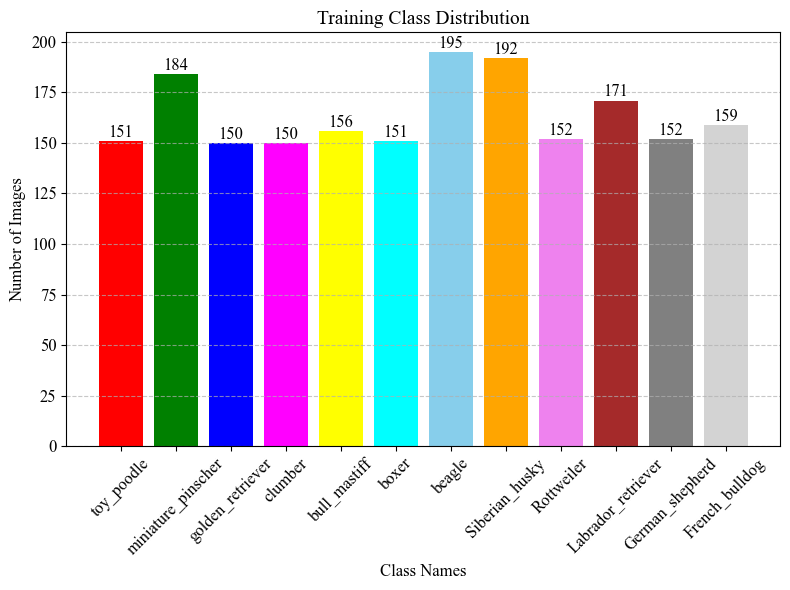

In [34]:
# Class distribution data
class_names = []
class_counts = []
for item in sorted_train_histogram:
  class_names.append(item[0])
  class_counts.append(item[1])


# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.rcParams['font.family'] = 'Times New Roman'
bars = plt.bar(class_names, class_counts, color=['red', 'green', 'blue', 'magenta', 'yellow', 'cyan', 'skyblue', 'orange', 'violet', 'brown', 'gray', 'lightgray'])

# Add labels and title

plt.title('Training Class Distribution', fontsize=14)
plt.xlabel('Class Names', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Annotate bar values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 2, str(yval), ha='center', fontsize=12)
image_path = os.path.join(os.getcwd(), "../train_data.png")
plt.tight_layout()
plt.savefig(image_path)
plt.show()

In [35]:
class_indices = val_generator.class_indices
class_names = {v: k for k, v in class_indices.items()}

from collections import Counter

class_counts = Counter(val_generator.classes)
total_data_per_class = {class_names[k]: v for k, v in class_counts.items()}

val_histogram = {}
for class_name, count in total_data_per_class.items():
  val_histogram[class_name.split("-")[1]] = count
# print(val_histogram)

sorted_val_histogram = sorted(val_histogram.items(), key=lambda x: x[0], reverse=True)
# print(sorted_val_histogram, type(sorted_val_histogram))

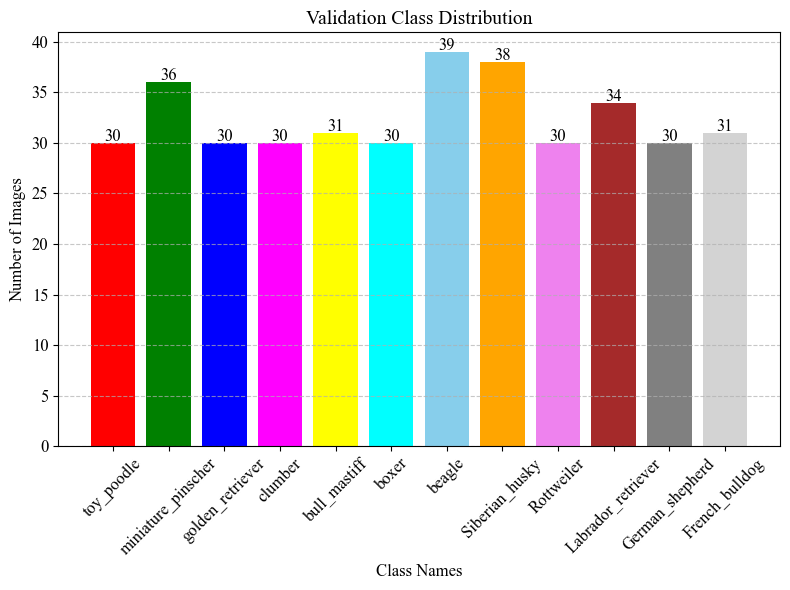

In [36]:
# Class distribution data
class_names = []
class_counts = []
for item in sorted_val_histogram:
  class_names.append(item[0])
  class_counts.append(item[1])


# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.rcParams['font.family'] = 'Times New Roman'
bars = plt.bar(class_names, class_counts, color=['red', 'green', 'blue', 'magenta', 'yellow', 'cyan', 'skyblue', 'orange', 'violet', 'brown', 'gray', 'lightgray'])

# Add labels and title

plt.title('Validation Class Distribution', fontsize=14)
plt.xlabel('Class Names', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Annotate bar values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.2, str(yval), ha='center', fontsize=12)
image_path = os.path.join(os.getcwd(), "../val_data.png")
plt.tight_layout()
plt.savefig(image_path)
plt.show()

In [48]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import NASNetLarge
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

def create_model(base_model_type='InceptionV3', num_classes=120):  # Adjust classes based on breeds
    if base_model_type == 'InceptionV3':
        base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    elif base_model_type == 'NASNetLarge':
        base_model = NASNetLarge(weights='imagenet', include_top=False, input_shape=(331, 331, 3))
    else:
        raise ValueError("Unsupported base model type.")

    # Add custom layers for breed-specific classification
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)

    # Freeze base model layers
    for layer in base_model.layers:
        layer.trainable = False

    return model

model = create_model(base_model_type='InceptionV3', num_classes=12)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [17]:
# model.summary()

In [49]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=val_generator.samples // val_generator.batch_size
)

Epoch 1/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 18s 234ms/step - accuracy: 0.1630 - loss: 19.2341 - val_accuracy: 0.5547 - val_loss: 2.5118
Epoch 2/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.1562 - loss: 9.9561 - val_accuracy: 0.6250 - val_loss: 2.0221
Epoch 3/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 171ms/step - accuracy: 0.3915 - loss: 6.3075 - val_accuracy: 0.8229 - val_loss: 1.1639
Epoch 4/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.6562 - loss: 3.4244 - val_accuracy: 0.7969 - val_loss: 1.4228
Epoch 5/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 170ms/step - accuracy: 0.6170 - loss: 3.8570 - val_accuracy: 0.9193 - val_loss: 0.3016
Epoch 6/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.6562 - loss: 3.3523 - val_accuracy: 0.9349 - val_loss: 0.3301
Epoch 7/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 168ms/step - accuracy: 0.7911 - loss: 1.7839 - val_accuracy: 0.9505 - val_loss: 0.2774
Epoch 8/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9062 - loss: 0.5448 - val_accuracy: 0

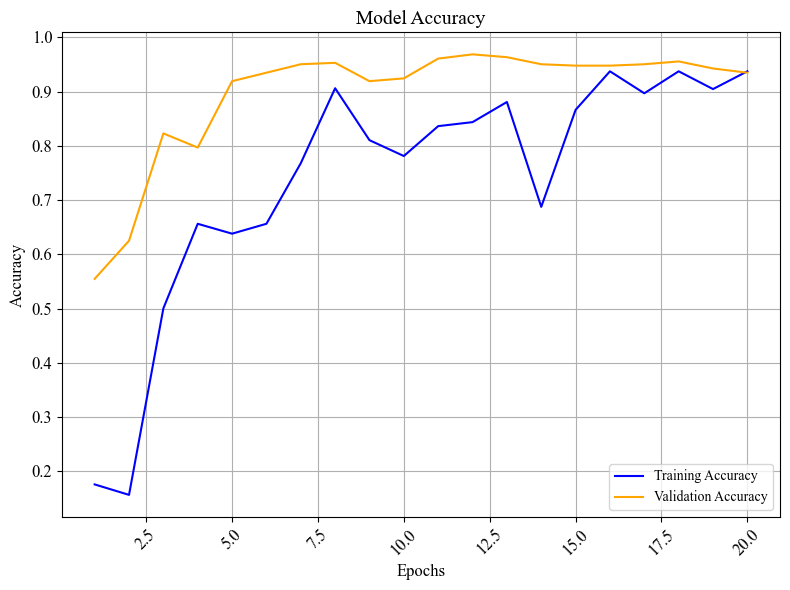

In [85]:
import matplotlib.pyplot as plt

# Extract training and validation accuracy from the history object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot the training and validation accuracy
plt.rcdefaults()
plt.figure(figsize=(8, 6))
plt.rcParams['font.family'] = 'Times New Roman'
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy', color='blue')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy', color='orange')

# Add labels and title

plt.title('Model Accuracy', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

image_path = os.path.join(os.getcwd(), "../train_val_acc.png")
plt.tight_layout()
plt.savefig(image_path)
plt.show()

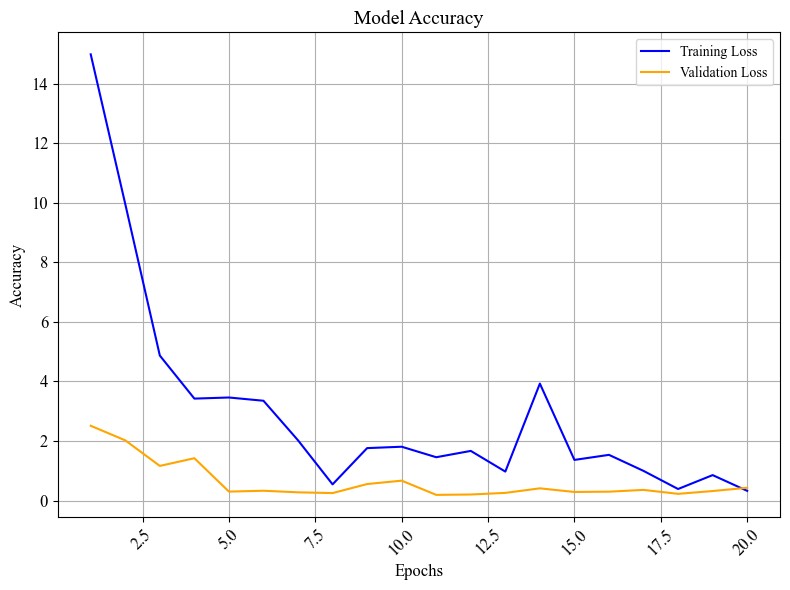

In [87]:
# Extract training and validation loss from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']


# Plot the training and validation loss
plt.figure(figsize=(8, 6))
plt.rcdefaults()
plt.rcParams['font.family'] = 'Times New Roman'
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss', color='blue')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss', color='orange')

# Add labels and title

plt.title('Model Accuracy', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

image_path = os.path.join(os.getcwd(), "../train_val_loss.png")
plt.tight_layout()
plt.savefig(image_path)
plt.show()

13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 151ms/step


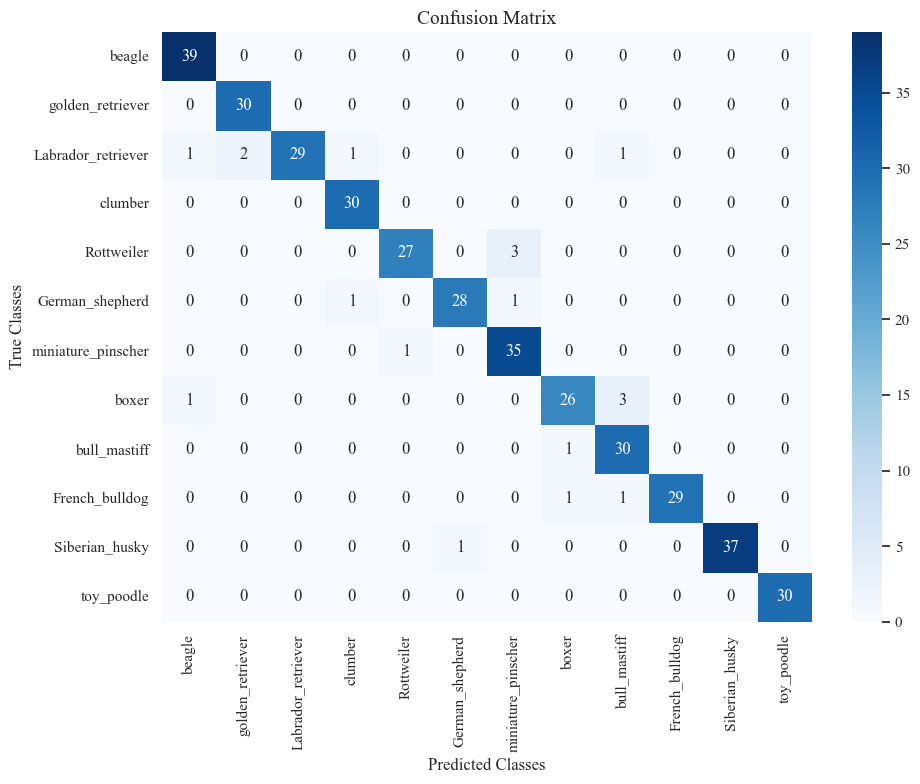

In [82]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


y_true = val_generator.classes  # True labels
class_indices = val_generator.class_indices  # Class mapping
classes = list(class_indices.keys())  # Class names
classes = [x.split("-")[1] for x in classes]

# Predict probabilities
y_pred_probs = model.predict(val_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
plt.rcParams['font.family'] = 'Times New Roman'

sns.set(font='Times New Roman')
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Classes', fontsize=12)
plt.ylabel('True Classes', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)
image_path = os.path.join(os.getcwd(), "../conf_mat.png")
plt.tight_layout()
plt.savefig(image_path)
plt.show()

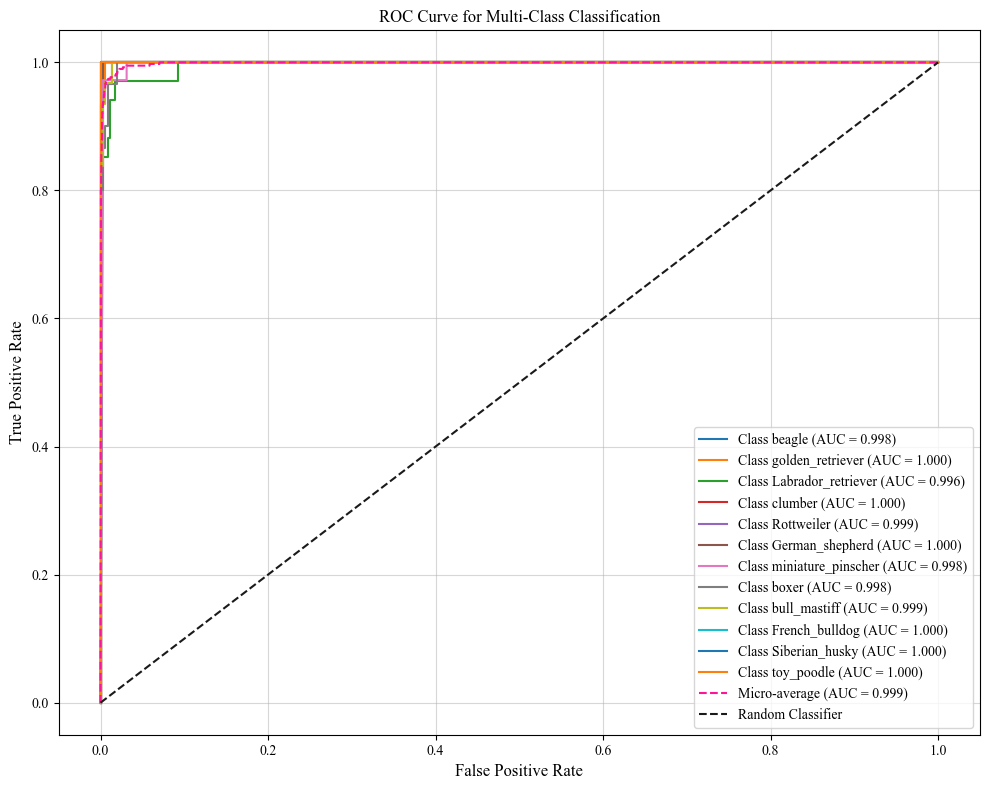

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
n_classes = 12
# Binarize the true labels (for multi-class ROC curve)
y_true_binarized = label_binarize(y_true, classes=range(n_classes))

# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}

plt.figure(figsize=(10, 8))
plt.rcParams['font.family'] = 'Times New Roman'

for i in range(12):
    fpr[i], tpr[i], _ = roc_curve(y_true_binarized[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f'Class {classes[i]} (AUC = {roc_auc[i]:.3f})')

# Micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_binarized.ravel(), y_pred_probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.plot(fpr["micro"], tpr["micro"], linestyle='--', label=f"Micro-average (AUC = {roc_auc['micro']:.3f})", color='deeppink')

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve for Multi-Class Classification', fontsize=12)
plt.legend(loc='lower right')
plt.grid(alpha=0.5)
# plt.rcParams.update(plt.rcParamsDefault)

image_path = os.path.join(os.getcwd(), "../roc_auc.png")
plt.tight_layout()
plt.savefig(image_path)
plt.show()

In [91]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.metrics import precision_recall_curve, f1_score
# from sklearn.preprocessing import label_binarize

# # Step 1: Extract y_true and y_pred from val_generator
# y_true = []
# y_pred = []

# for batch_x, batch_y in val_generator:
#     y_true.append(batch_y)
#     y_pred.append(model.predict(batch_x))

#     # Stop after one epoch
#     if len(y_true) * val_generator.batch_size >= len(val_generator):
#         break

# # Concatenate all batches
# y_true = np.concatenate(y_true, axis=0)
# y_pred = np.concatenate(y_pred, axis=0)

# # Step 2: Ensure the true labels are binarized for multi-class evaluation
# num_classes = y_pred.shape[1]  # Assuming y_pred has shape (samples, 12)
# y_true_binarized = label_binarize(y_true, classes=list(range(num_classes)))

# # Step 3: Compute F1 score for various thresholds
# thresholds = np.linspace(0, 1, 100)
# f1_scores = {i: [] for i in range(num_classes)}

# for i in range(num_classes):
#     # Skip this class if it has no positive examples
#     if y_true_binarized[:, i].sum() == 0:
#         print(f"Warning: Class {i} has no positive samples in y_true. Skipping.")
#         continue

#     for t in thresholds:
#         pred_class = (y_pred[:, i] >= t).astype(int)
#         if pred_class.sum() == 0:
#             # Avoid division by zero or undefined F1
#             f1_scores[i].append(0.0)
#         else:
#             f1 = f1_score(y_true_binarized[:, i], pred_class, zero_division=1)
#             f1_scores[i].append(f1)

# # Step 4: Plot F1 Score Curve
# plt.figure(figsize=(12, 8))
# for i in range(num_classes):
#     if i in f1_scores and len(f1_scores[i]) > 0:
#         plt.plot(thresholds, f1_scores[i], label=f'Class {i}')

# # Add plot annotations
# plt.xlabel('Threshold')
# plt.ylabel('F1 Score')
# plt.title('F1 Score Curve for Dog Breed Classification')
# plt.legend(loc='lower left', bbox_to_anchor=(1, 0), ncol=1)
# plt.grid()
# plt.tight_layout()
# plt.show()


In [103]:
# 5 Fold cross validation

import os
import pandas as pd

from glob import glob

dataset_dir = "../dataset/filtered/ImageCropped"

# Extract file paths and labels
image_paths = glob(os.path.join(dataset_dir, "*/*.jpg"))  # adjust ext if needed
data = {
    "filename": image_paths,
    "class": [os.path.basename(os.path.dirname(p)) for p in image_paths]
}
df = pd.DataFrame(data)


In [105]:
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_true = val_generator.classes  # True labels
class_indices = val_generator.class_indices  # Class mapping
classes = list(class_indices.keys())  # Class names
classes = [x.split("-")[1] for x in classes]
true_labels_all = []
pred_labels_all = []

for fold, (train_idx, val_idx) in enumerate(skf.split(df['filename'], df['class'])):

    print(f"\nFold {fold + 1}")

    train_df = df.iloc[train_idx]
    val_df = df.iloc[val_idx]

    # Create generators
    datagen = ImageDataGenerator(rescale=1./255)

    train_gen = datagen.flow_from_dataframe(
        dataframe=train_df,
        x_col='filename',
        y_col='class',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        shuffle=True
    )

    val_gen = datagen.flow_from_dataframe(
        dataframe=val_df,
        x_col='filename',
        y_col='class',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        shuffle=False
    )

    # Train your model here
    model.fit(train_gen, epochs=5, validation_data=val_gen, verbose=1)

    # Predict
    y_true = val_gen.classes
    y_pred_probs = model.predict(val_gen)
    y_pred = np.argmax(y_pred_probs, axis=1)

    true_labels_all.extend(y_true)
    pred_labels_all.extend(y_pred)

    # Confusion Matrix for current fold
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    plt.rcParams['font.family'] = 'Times New Roman'
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Classes', fontsize=12)
    plt.ylabel('True Classes', fontsize=12)
    plt.title(f'Confusion Matrix - Fold {fold + 1}', fontsize=14)
    plt.tight_layout()
    plt.savefig(f"conf_matrix_fold_{fold + 1}.png")
    plt.close()

    y_true = val_gen.classes
    y_pred_probs = model.predict(val_gen)
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Compute metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_true, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)

    print(f"Fold {fold+1} Results:")
    print(f"  Accuracy : {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall   : {recall:.4f}")
    print(f"  F1-score : {f1:.4f}")

    fold_metrics.append({
        'fold': fold + 1,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    })

# Convert to DataFrame
df = pd.DataFrame(fold_metrics)

# Calculate column-wise mean
average_metrics = df.mean(numeric_only=True)

# Round to 4 decimals (or 2 if converting to %)
average_percent = (average_metrics * 100).round(2)

print("Average metrics (in %):")
print(average_percent)




Fold 1
Found 1570 validated image filenames belonging to 12 classes.
Found 393 validated image filenames belonging to 12 classes.
Epoch 1/5


/Volumes/HDA/personal/Piyes/DOG_BREED/dogenv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 126ms/step - accuracy: 0.9835 - loss: 0.1478 - val_accuracy: 0.9975 - val_loss: 0.0061
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - accuracy: 0.9877 - loss: 0.0614 - val_accuracy: 0.9975 - val_loss: 0.0047
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.9940 - loss: 0.0224 - val_accuracy: 0.9975 - val_loss: 0.0059
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.9890 - loss: 0.0595 - val_accuracy: 0.9975 - val_loss: 0.0031
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.9912 - loss: 0.0585 - val_accuracy: 0.9975 - val_loss: 0.0065
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step
Fold 1 Results:
  Accuracy : 0.9975
  Precision: 0.9975
  Recall   : 0.9972
  F1-score : 0.9973

Fold 2
Found 1570 validated image filenames belonging to 12 classes.
Found 393 validated image filenames belonging to 12 classes.
Epoch 1/5


/Volumes/HDA/personal/Piyes/DOG_BREED/dogenv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - accuracy: 0.9936 - loss: 0.0476 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - accuracy: 0.9933 - loss: 0.0313 - val_accuracy: 0.9898 - val_loss: 0.0342
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - accuracy: 0.9834 - loss: 0.1165 - val_accuracy: 0.9975 - val_loss: 0.0083
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 118ms/step - accuracy: 0.9926 - loss: 0.0708 - val_accuracy: 0.9975 - val_loss: 0.0039
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.9918 - loss: 0.0424 - val_accuracy: 0.9898 - val_loss: 0.0487
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step
Fold 2 Results:
  Accuracy : 0.9898
  Precision: 0.9899
  Recall   : 0.9899
  F1-score : 0.9896

Fold 3
Found 1570 validated image filenames belonging to 12 classes.
Found 393 validated image filenames belonging to 12 classes.
Epoch 1/5


/Volumes/HDA/personal/Piyes/DOG_BREED/dogenv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - accuracy: 0.9901 - loss: 0.0405 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - accuracy: 0.9941 - loss: 0.0416 - val_accuracy: 1.0000 - val_loss: 6.7300e-05
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.9922 - loss: 0.0438 - val_accuracy: 1.0000 - val_loss: 6.8481e-05
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - accuracy: 0.9961 - loss: 0.0206 - val_accuracy: 1.0000 - val_loss: 5.7316e-04
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - accuracy: 0.9912 - loss: 0.0337 - val_accuracy: 0.9898 - val_loss: 0.0291
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step
Fold 3 Results:
  Accuracy : 0.9898
  Precision: 0.9903
  Recall   : 0.9889
  F1-score : 0.9891

Fold 4
Found 1571 validated image filenames belonging to 12 classes.
Found 392 validated image filenames belonging to 12 classes.
Epoch 1/5


/Volumes/HDA/personal/Piyes/DOG_BREED/dogenv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - accuracy: 0.9893 - loss: 0.0479 - val_accuracy: 0.9949 - val_loss: 0.0120
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - accuracy: 0.9901 - loss: 0.0466 - val_accuracy: 0.9974 - val_loss: 0.0021
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - accuracy: 0.9833 - loss: 0.0987 - val_accuracy: 1.0000 - val_loss: 7.7556e-06
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - accuracy: 0.9941 - loss: 0.0304 - val_accuracy: 1.0000 - val_loss: 8.5162e-04
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - accuracy: 0.9917 - loss: 0.0547 - val_accuracy: 1.0000 - val_loss: 1.4842e-05
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step
Fold 4 Results:
  Accuracy : 1.0000
  Precision: 1.0000
  Recall   : 1.0000
  F1-score : 1.0000

Fold 5
Found 1571 validated image filenames belonging to 12 classes.
Found 392 validated image filenames belonging to 12 classes.
Epoch 1/5


/Volumes/HDA/personal/Piyes/DOG_BREED/dogenv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - accuracy: 0.9914 - loss: 0.0599 - val_accuracy: 1.0000 - val_loss: 1.0080e-04
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.9877 - loss: 0.0615 - val_accuracy: 1.0000 - val_loss: 5.5886e-04
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.9960 - loss: 0.0309 - val_accuracy: 0.9974 - val_loss: 0.0055
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - accuracy: 0.9882 - loss: 0.0470 - val_accuracy: 1.0000 - val_loss: 1.3068e-04
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - accuracy: 0.9962 - loss: 0.0286 - val_accuracy: 1.0000 - val_loss: 1.1172e-05
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step
Fold 5 Results:
  Accuracy : 1.0000
  Precision: 1.0000
  Recall   : 1.0000
  F1-score : 1.0000
Average metrics (in %):
fold         300.00
accuracy      99.64
precision     99.65
recall        99.63
f1_score      99.63
dtype: float64


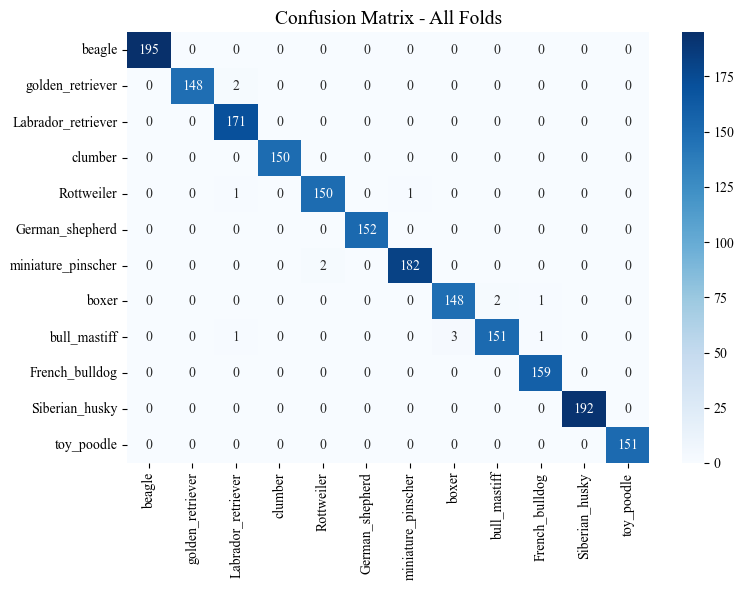

In [95]:
final_matrix = confusion_matrix(true_labels_all, pred_labels_all)
plt.figure(figsize=(8, 6))
sns.heatmap(final_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix - All Folds', fontsize=14)
plt.tight_layout()
plt.savefig("conf_matrix_all_folds.png")
plt.show()
